# Importing of Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from turtle import color
import math

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_auc_score

import keras as k
from keras import utils, models, layers, optimizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.layers import Dense, GRU, BatchNormalization, Activation, LSTM, Flatten, LeakyReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from keras.models import Sequential


from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.feature_selection import RFE

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix,mean_squared_error)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
import optuna

import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import tensorflow as tf

# !pip install --quiet shap==0.39.0
#import shap

sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

import os
import datetime
from os.path import isfile, join
from sys import getsizeof
import glob

from random import *

import time

# The Data

In [2]:
df=pd.read_csv('DMSP_final_training.csv')

In [3]:
df.head(25)

Datetimes  SC_AACGM_LAT  ELE_TOTAL_ENERGY_FLUX  ID_SC    sin_ut  \
0   1987-01-12 12:57:00     51.143220           6.464854e+08    6.0 -0.246153   
1   1987-01-12 12:58:00     54.137207           7.884885e+08    6.0 -0.250380   
2   1987-01-12 13:01:00     62.928176           1.404024e+09    6.0 -0.263031   
3   1987-01-12 13:02:00     65.719631           6.078507e+10    6.0 -0.267238   
4   1987-01-12 13:03:00     68.392364           1.229411e+12    6.0 -0.271440   
5   1987-01-12 13:04:00     70.905061           2.776722e+11    6.0 -0.275637   
6   1987-01-28 19:08:00     49.152001           2.143918e+08    6.0 -0.956305   
7   1987-01-28 19:09:00     52.332499           3.502870e+08    6.0 -0.955020   
8   1987-01-28 19:10:00     55.550193           4.389556e+08    6.0 -0.953717   
9   1987-01-28 19:11:00     58.748771           1.358952e+08    6.0 -0.952396   
10  1987-01-28 19:12:00     61.868945           1.832602e+10    6.0 -0.951057   
11  1987-01-28 19:13:00     64.855335           1.022059e+12    6.0 -0.949699   
12  1987-01-28 19:14:00     67.654220           2.037037e+12    6.0 -0.948324   
13  1987-04-01 18:42:00     64.890529           3.257492e+10    6.0 -0.983255   
14  1987-04-01 18:43:00     67.684899           1.387078e+12    6.0 -0.982450   
15  1987-04-01 18:44:00     70.212809           2.120305e+10    6.0 -0.981627   
16  1987-04-01 18:45:00     72.380865           4.629366e+08    6.0 -0.980785   
17  1987-04-01 18:49:00     74.722286           1.756819e+08    6.0 -0.977231   
18  1987-04-01 18:52:00     68.980141           5.156456e+11    6.0 -0.974370   
19  1987-04-01 18:53:00     66.216101           8.294967e+08    6.0 -0.973379   
20  1987-04-01 18:59:00     47.248369           5.782167e+10    6.0 -0.967046   
21  1987-04-01 19:37:00     68.015942           3.798164e+09    6.0 -0.911762   
22  1987-04-01 19:39:00     71.803043           9.956166e+10    6.0 -0.908143   
23  1987-04-01 19:40:00     73.060850           1.181122e+09    6.0 -0.906308   
24  1987-04-01 19:41:00     73.714825           3.087858e+11    6.0 -0.904455   

      cos_ut   sin_doy   cos_doy  sin_SC_AACGM_LTIME  cos_SC_AACGM_LTIME  \
0  -0.969231  0.205104  0.978740            0.996134            0.087845   
1  -0.968148  0.205104  0.978740            0.992626            0.121216   
2  -0.964787  0.205104  0.978740            0.968006            0.250928   
3  -0.963630  0.205104  0.978740            0.950633            0.310316   
4  -0.962455  0.205104  0.978740            0.924624            0.380881   
5  -0.961262  0.205104  0.978740            0.885121            0.465360   
6   0.292372  0.463550  0.886071            0.962836            0.270086   
7   0.296542  0.463550  0.886071            0.953066            0.302761   
8   0.300706  0.463550  0.886071            0.939701            0.341998   
9   0.304864  0.463550  0.886071            0.921149            0.389210   
10  0.309017  0.463550  0.886071            0.894829            0.446408   
11  0.313164  0.463550  0.886071            0.857105            0.515142   
12  0.317305  0.463550  0.886071            0.802454            0.596714   
13  0.182236  0.999991  0.004304            0.893184            0.449692   
14  0.186524  0.999991  0.004304            0.843751            0.536736   
15  0.190809  0.999991  0.004304            0.769401            0.638767   
16  0.195090  0.999991  0.004304            0.658845            0.752279   
17  0.212178  0.999991  0.004304           -0.189113            0.981955   
18  0.224951  0.999991  0.004304           -0.654452            0.756104   
19  0.229200  0.999991  0.004304           -0.733086            0.680136   
20  0.254602  0.999991  0.004304           -0.918560            0.395281   
21  0.410719  0.999991  0.004304           -0.732276           -0.681008   
22  0.418660  0.999991  0.004304           -0.525014           -0.851094   
23  0.422618  0.999991  0.004304           -0.365136           -0.930954   
24  0.4

# Exploratory Data Analysis

In [4]:
df.shape

(1945789, 74)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945789 entries, 0 to 1945788
Data columns (total 74 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Datetimes              object 
 1   SC_AACGM_LAT           float64
 2   ELE_TOTAL_ENERGY_FLUX  float64
 3   ID_SC                  float64
 4   sin_ut                 float64
 5   cos_ut                 float64
 6   sin_doy                float64
 7   cos_doy                float64
 8   sin_SC_AACGM_LTIME     float64
 9   cos_SC_AACGM_LTIME     float64
 10  F107                   float64
 11  Bz                     float64
 12  By                     float64
 13  Bx                     float64
 14  AL                     float64
 15  AU                     float64
 16  SymH                   float64
 17  PC                     float64
 18  vsw                    float64
 19  psw                    float64
 20  Bz_6hr                 float64
 21  By_6hr                 float64
 22  Bx_6hr            

In [6]:
df.describe()

SC_AACGM_LAT  ELE_TOTAL_ENERGY_FLUX         ID_SC        sin_ut  \
count  1.945789e+06           1.945789e+06  1.945789e+06  1.945789e+06   
mean   6.570635e+01           1.373119e+11  1.525736e+01 -1.545410e-02   
std    1.113037e+01           9.082375e+11  1.859397e+00  7.043815e-01   
min    4.500001e+01           8.270846e+06  6.000000e+00 -1.000000e+00   
25%    5.639839e+01           5.324880e+08  1.300000e+01 -7.163019e-01   
50%    6.683312e+01           1.740703e+09  1.500000e+01 -3.053851e-02   
75%    7.455945e+01           4.095110e+10  1.700000e+01  6.883546e-01   
max    8.998340e+01           2.242452e+14  1.800000e+01  1.000000e+00   

             cos_ut       sin_doy       cos_doy  sin_SC_AACGM_LTIME  \
count  1.945789e+06  1.945789e+06  1.945789e+06        1.945789e+06   
mean  -5.742040e-04 -5.886700e-02  1.281526e-02        3.735496e-02   
std    7.096535e-01  6.857191e-01  7.253690e-01        8.130553e-01   
min   -1.000000e+00 -9.999907e-01 -9.999630e-01       -1.000000e+00   
25%   -7.132504e-01 -7.176769e-01 -7.324941e-01       -8.898352e-01   
50%   -1.836970e-16 -1.116590e-01  2.151610e-02        2.416185e-01   
75%    7.132504e-01  6.152846e-01  7.498264e-01        8.730348e-01   
max    1.000000e+00  9.999907e-01  1.000000e+00        1.000000e+00   

       cos_SC_AACGM_LTIME          F107            Bz            By  \
count        1.945789e+06  1.945789e+06  1.945789e+06  1.945789e+06   
mean        -9.759640e-02  1.179359e+02  7.189684e-01  2.611516e-02   
std          5.727313e-01  4.578386e+01  2.840623e+00  3.767252e+00   
min         -1.000000e+00  6.510000e+01 -9.310000e+00 -2.457000e+01   
25%         -5.708443e-01  8.480000e+01 -1.110000e+00 -2.630000e+00   
50%         -1.467515e-01  1.072000e+02  4.800000e-01  3.000000e-02   
75%          3.497406e-01  1.392000e+02  2.230000e+00  2.680000e+00   
max          1.000000e+00  9.999000e+02  3.503000e+01  2.199000e+01   

                 Bx            AL            AU          SymH            PC  \
count  1.945789e+06  1.945789e+06  1.945789e+06  1.945789e+06  1.945789e+06   
mean   5.183986e-02 -6.735928e+01  4.849703e+01 -7.507380e+00  5.638133e-01   
std    3.353805e+00  8.210961e+01  4.408213e+01  1.237585e+01  9.275741e-01   
min   -1.769000e+01 -1.014000e+03 -2.900000e+01 -1.350000e+02 -8.310000e+00   
25%   -2.500000e+00 -8.900000e+01  1.800000e+01 -1.400000e+01  1.000000e-02   
50%    5.000000e-02 -3.300000e+01  3.400000e+01 -7.000000e+00  4.100000e-01   
75%    2.580000e+00 -1.600000e+01  6.400000e+01  0.000000e+00  1.050000e+00   
max    2.310000e+01  3.800000e+01  4.880000e+02  1.010000e+02  1.668000e+01   

                vsw           psw        Bz_6hr        By_6hr        Bx_6hr  \
count  1.945789e+06  1.945789e+06  1.945789e+06  1.945789e+06  1.945789e+06   
mean   4.146472e+02  1.716156e+00  5.152714e-01  2.437990e-02  4.258780e-02   
std    8.631995e+01  1.146411e+00  2.583073e+00  3.574082e+00  3.138489e+00   
min    2.097000e+02  2.000000e-02 -9.530833e+00 -2.194333e+01 -1.856583e+01   
25%    3.515000e+02  1.030000e+00 -1.074167e+00 -2.502500e+00 -2.336667e+00   
50%    4.003000e+02  1.440000e+00  3.008333e-01  4.166667e-02  5.583333e-02   
75%    4.595000e+02  2.070000e+00  1.795833e+00  2.534167e+00  2.400000e+00   
max    9.033000e+02  4.949000e+01  3.305250e+01  2.735000e+01  1.743250e+01   

             AL_6hr        AU_6hr      SymH_6hr        PC_6hr       vsw_6hr  \
count  1.945789e+06  1.945789e+06  1.945789e+06  1.945789e+06  1.945789e+06   
mean  -8.044786e+01  5.495920e+01 -9.272469e+00  6.937035e-01  4.199617e+02   
std    9.269203e+01  5.021653e+01  1.389573e+01  1.465656e+00  9.007010e+01   
min   -1.018500e+03 -1.283333e+01 -1.905000e+02 -7.445833e+00  2.400667e+02   
25%   -1.106667e+02  2.016667e+01 -1.600000e+01  7.500000e-02  3.532667e+02   
50%   -4.141667e+01  3.808333e+01 -7.916667e+00  5.008333e-01  4.043500e+02   
75%   -1.908333e+01  7.366667e+01 -7.500000e-01  1.178333e+00  4.683667e+02   
max 

In [7]:
df.columns

Index(['Datetimes', 'SC_AACGM_LAT', 'ELE_TOTAL_ENERGY_FLUX', 'ID_SC', 'sin_ut',
       'cos_ut', 'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME',
       'cos_SC_AACGM_LTIME', 'F107', 'Bz', 'By', 'Bx', 'AL', 'AU', 'SymH',
       'PC', 'vsw', 'psw', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AL_6hr', 'AU_6hr',
       'SymH_6hr', 'PC_6hr', 'vsw_6hr', 'psw_6hr', 'Bz_3hr', 'By_3hr',
       'Bx_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 'PC_3hr', 'vsw_3hr',
       'psw_3hr', 'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr',
       'PC_1hr', 'vsw_1hr', 'psw_1hr', 'Bz_45min', 'By_45min', 'Bx_45min',
       'AL_45min', 'AU_45min', 'SymH_45min', 'PC_45min', 'vsw_45min',
       'psw_45min', 'Bz_30min', 'By_30min', 'Bx_30min', 'AL_30min', 'AU_30min',
       'SymH_30min', 'PC_30min', 'vsw_30min', 'psw_30min', 'Bz_10min',
       'By_10min', 'Bx_10min', 'AL_10min', 'AU_10min', 'SymH_10min',
       'PC_10min', 'vsw_10min', 'psw_10min'],
      dtype='object')

In [8]:
def missing_values_table(df):
        # Total missing values by column
        mis_val = df.isnull().sum()
        
        # Percentage of missing values by column
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # build a table with the thw columns
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
pd.set_option("display.max_rows", None)

In [10]:
missing_values_train = missing_values_table(df)
missing_values_train

Your selected dataframe has 74 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

# Exploratory Data Analysis

In [12]:
df=df[~df.index.duplicated()]

In [13]:
bins_fd=math.floor(len(df)**(1/3.5))

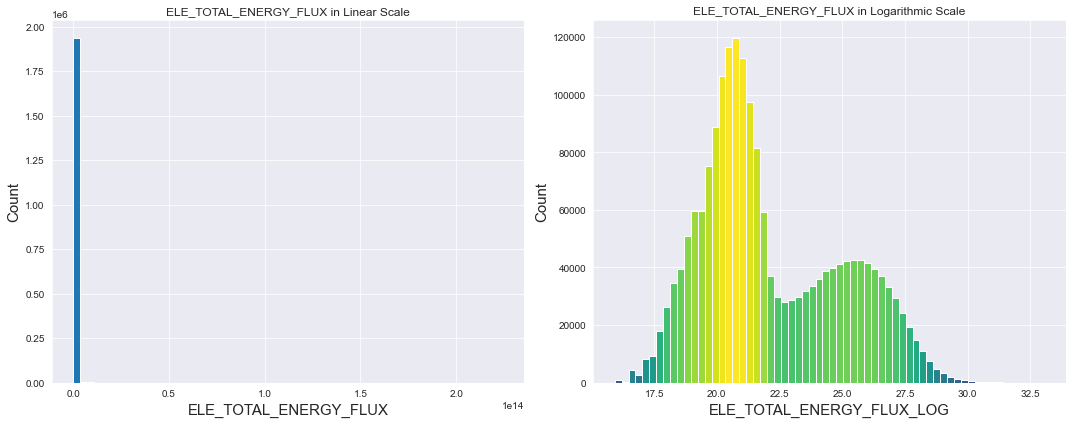

In [15]:
from matplotlib import colors
fig,ax=plt.subplots(1,2,figsize=(15,6),sharey=False)
n,bins,patches=ax[0].hist(df['ELE_TOTAL_ENERGY_FLUX'],bins=bins_fd)
df['ELE_TOTAL_ENERGY_FLUX_LOG']=np.log(df['ELE_TOTAL_ENERGY_FLUX'])
n,bins,patches=ax[1].hist(df['ELE_TOTAL_ENERGY_FLUX_LOG'],bins=bins_fd)

fracs=((n**(1/5))/n.max())
norm=colors.Normalize(fracs.min(),fracs.max())

for frac,patch in zip(fracs,patches):
    color=plt.cm.viridis(norm(frac))
    patch.set_facecolor(color)

ax[0].set_title('ELE_TOTAL_ENERGY_FLUX in Linear Scale')
ax[0].set_xlabel('ELE_TOTAL_ENERGY_FLUX',fontsize=15)
ax[0].set_ylabel('Count',fontsize=15)
ax[1].set_title('ELE_TOTAL_ENERGY_FLUX in Logarithmic Scale')
ax[1].set_xlabel('ELE_TOTAL_ENERGY_FLUX_LOG',fontsize=15)
ax[1].set_ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

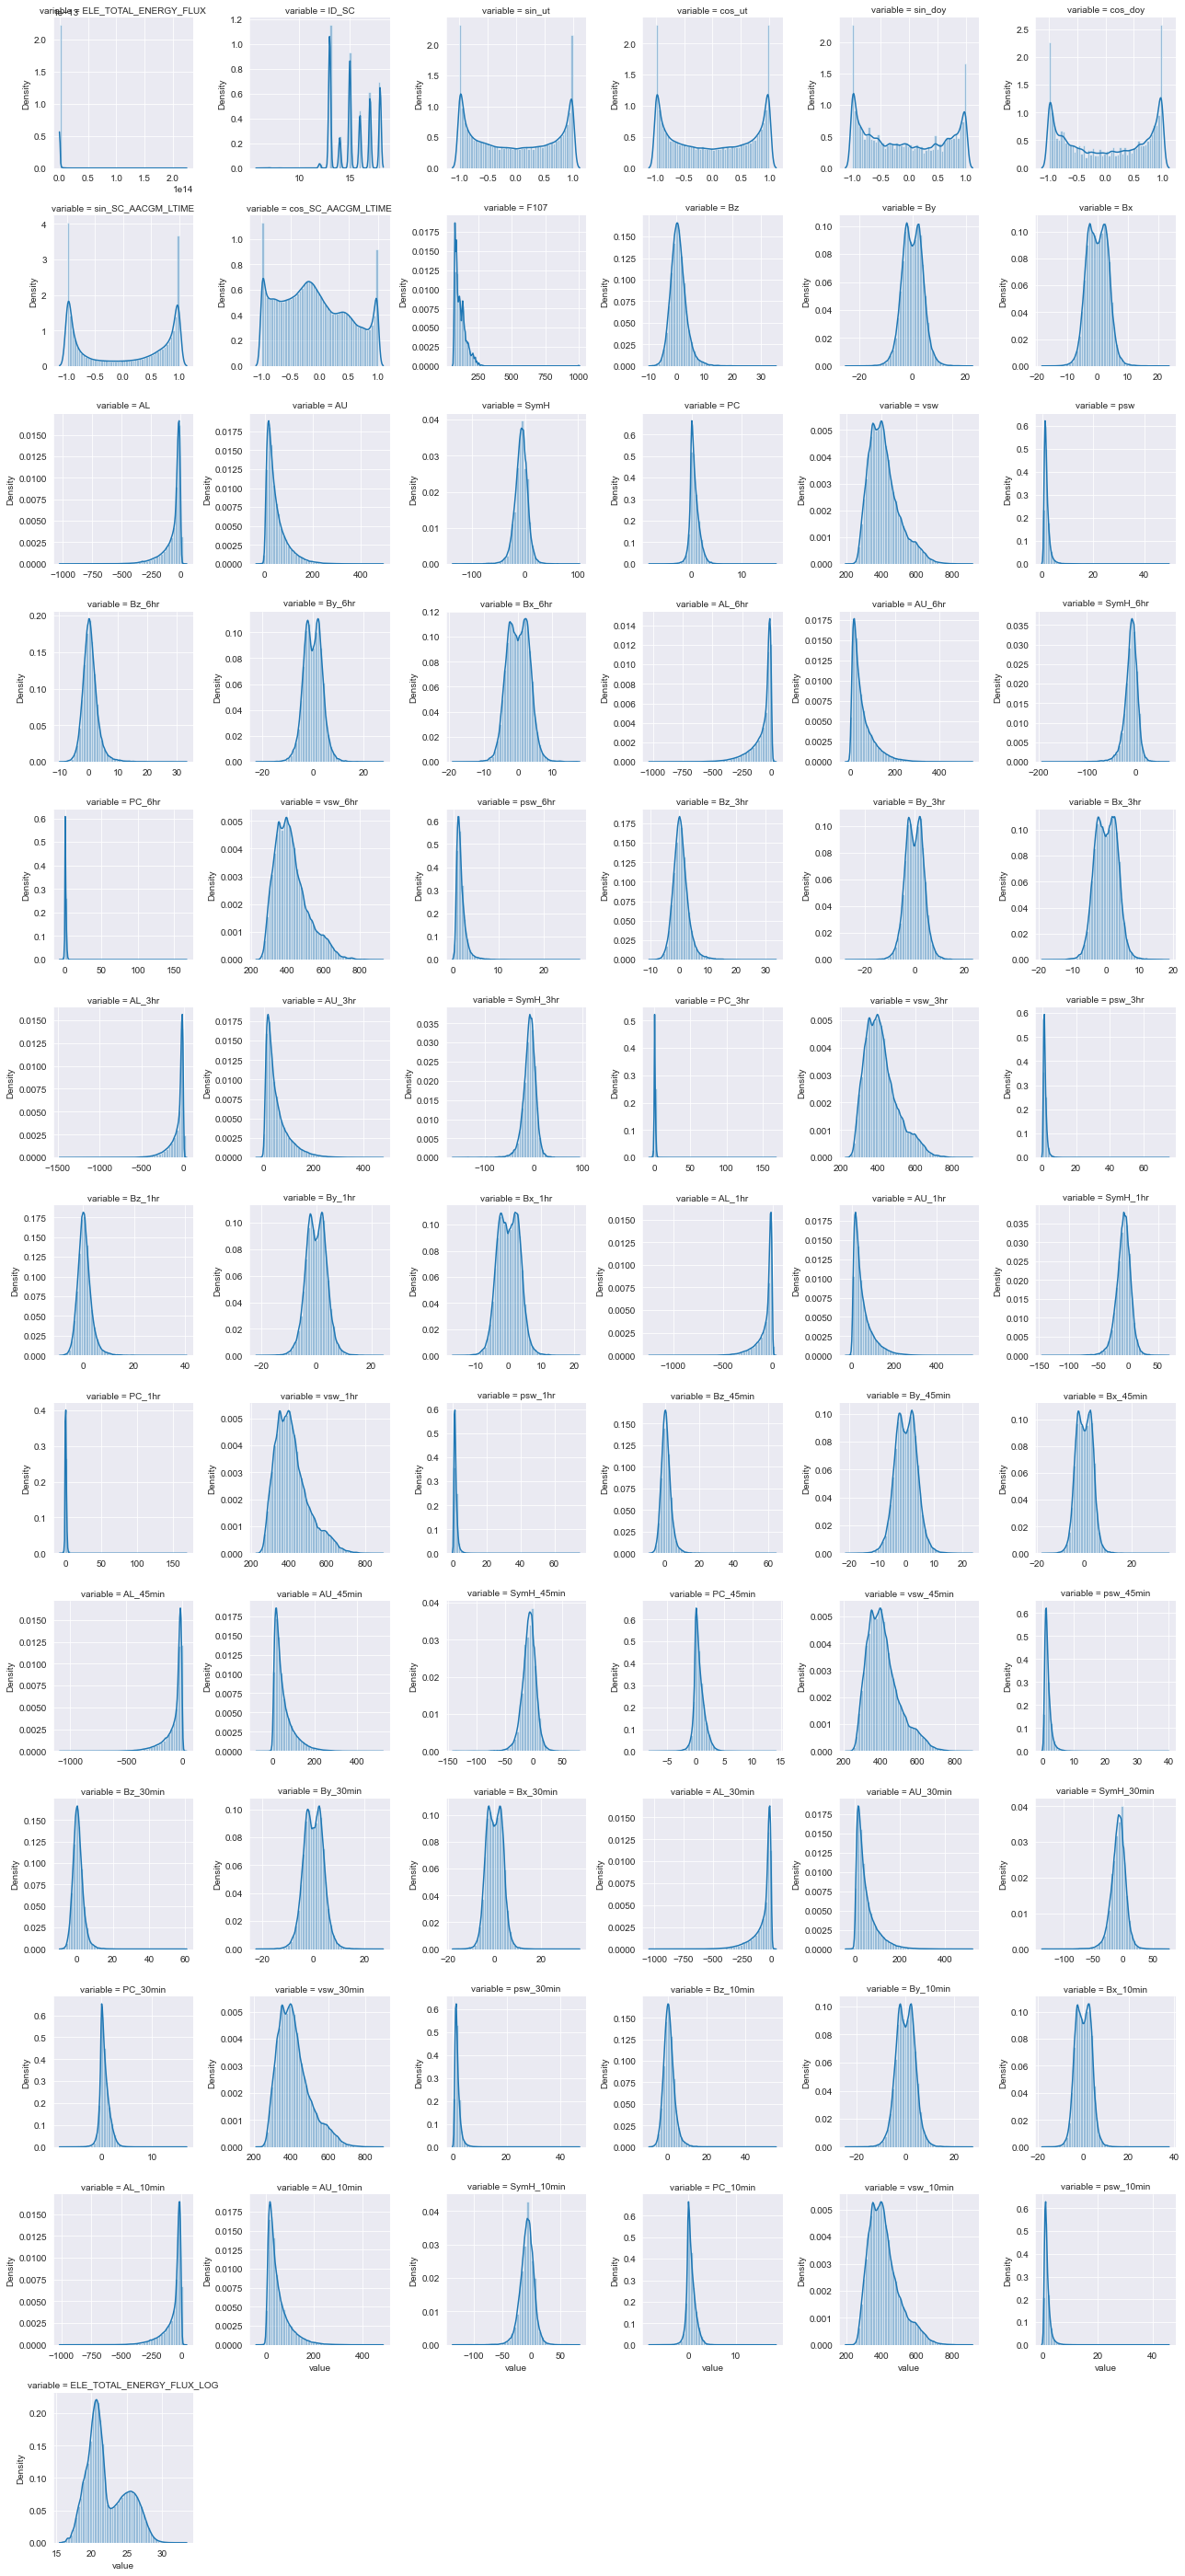

In [16]:
unpivot=pd.melt(df,df.describe().columns[0],df.describe().columns[1:])
grid=sns.FacetGrid(unpivot,col='variable',col_wrap=6,sharex=False,sharey=False)
grid.map(sns.distplot,"value")

plt.tight_layout()
plt.show()

In [37]:
from tqdm import tqdm
def corr_def(df,cols):
    df_corr_coeff=pd.DataFrame(columns=['Feature 1','Feature 2','Corr_Coeff'])
    for i in tqdm(range(len(cols)),desc='Progress'):
        for j in range(len(cols)):
            if i<j:
                df_corr_coeff.loc[len(df_corr_coeff.index)]=[cols[i],cols[j],df[cols[i]].corr(df[cols[j]])]
                
                
    return df_corr_coeff.sort_values(by='Corr_Coeff',ascending=False)

In [38]:
pd.set_option('display.max_rows',None)
cols=[col for col in df if df[col].dtype=='float64']
cols.remove('ELE_TOTAL_ENERGY_FLUX')
df_corr_coeff=corr_def(df,cols)
display(df_corr_coeff)

Progress: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 73/73 [01:16<00:00,  1.05s/it]


Feature 1                  Feature 2  Corr_Coeff
2201             vsw_1hr                  vsw_45min    0.995796
1085                 vsw                  vsw_10min    0.995644
2426           vsw_45min                  vsw_30min    0.994204
2570           vsw_30min                  vsw_10min    0.993050
2210             vsw_1hr                  vsw_30min    0.992567
970                 SymH                 SymH_10min    0.992147
1076                 vsw                  vsw_30min    0.991041
2435           vsw_45min                  vsw_10min    0.990194
2140            SymH_1hr                 SymH_45min    0.990033
2219             vsw_1hr                  vsw_10min    0.989496
1067                 vsw                  vsw_45min    0.988668
2383          SymH_45min                 SymH_30min    0.988540
1058                 vsw                    vsw_1hr    0.988169
2545          SymH_30min                 SymH_10min    0.984339
1895             vsw_3hr                    vsw_1hr    0.983120
1904             vsw_3hr                  vsw_45min    0.979095
2149            SymH_1hr                 SymH_30min    0.978287
1508             vsw_6hr                    vsw_3hr    0.978083
1913             vsw_3hr                  vsw_30min    0.977152
961                 SymH                 SymH_30min    0.976459
1922             vsw_3hr                  vsw_10min    0.974749
1049                 vsw                    vsw_3hr    0.973478
2392          SymH_45min                 SymH_10min    0.972756
1141                 psw                  psw_10min    0.968642
952                 SymH                 SymH_45min    0.964633
1517             vsw_6hr                    vsw_1hr    0.962520
2158            SymH_1hr                 SymH_10min    0.962368
2230             psw_1hr                  psw_45min    0.961840
1526             vsw_6hr                  vsw_45min    0.958282
2446           psw_45min                  psw_30min    0.957086
1535             vsw_6hr                  vsw_30min    0.956275
943                 SymH                   SymH_1hr    0.953803
1544             vsw_6hr                  vsw_10min    0.953682
1040                 vsw                    vsw_6hr    0.952231
2581           psw_30min                  psw_10min    0.947699
790                   Bx                   Bx_10min    0.942204
911                   AU                   AU_10min    0.939253
2041              Bx_1hr                   Bx_45min    0.938205
1028                  PC                   PC_10min    0.935070
728                   By                   By_10min    0.934177
2239             psw_1hr                  psw_30min    0.931577
2006              By_1hr                   By_45min    0.931105
1132                 psw                  psw_30min    0.929440
2108              AU_1hr                   AU_45min    0.927944
851                   AL                   AL_10min    0.920368
2311            Bx_45min                   Bx_30min    0.919989
2455           psw_45min                  psw_10min    0.918570
2360            AU_45min                   AU_30min    0.910976
2285            By_45min                   By_30min    0.910877
1816            SymH_3hr                   SymH_1hr    0.908129
1123                 psw                  psw_45min    0.901510
2500            Bx_30min                   Bx_10min    0.901483
2248             psw_1hr                  psw_10min    0.899990
2075              AL_1hr                   AL_45min    0.896197
2405            PC_45min                   PC_30min    0.892225
1825            SymH_3hr                 SymH_45min    0.891346
2483            By_30min                   By_10min    0.889083
2050              Bx_1hr                   Bx_30min    0.887134
1114                 psw                    psw_1hr    0.886701
2531            AU_30min                   AU_10min    0.884839
1411            SymH_6hr                   SymH_3hr    0.883126
1834            SymH_3hr                 SymH_3

In [39]:
num_bins=math.floor(len(df_corr_coeff)**(1/2))
fig=px.histogram(df_corr_coeff,x='Corr_Coeff',nbins=num_bins,color_discrete_sequence=['indianred'],
                title='Correlation Coefficient of Numerical Features')
fig.show()

In [56]:
df_cum=df.copy()
df_cum=df_cum.set_index('Datetimes')
df_cum.index=pd.to_datetime(df_cum.index)

In [57]:
mask_val=[(df_cum.index.year==2002) & (df_cum['ID_SC']==13.0)]

In [62]:
df_val=df_cum[mask_val[0].copy(deep=True)]

In [65]:
df_train=df_cum.copy(deep=True).drop(df_cum.index[mask_val[0]])

In [8]:
df_train.to_csv('train.csv')

In [9]:
df_val.to_csv('test.csv')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
x_train=train.copy(deep=True)
y_train=x_train.pop('ELE_TOTAL_ENERGY_FLUX')
x_test=test.copy(deep=True)
y_test=x_test.pop('ELE_TOTAL_ENERGY_FLUX')
scale_x=StandardScaler()
scale_x=scale_x.fit(x_train.values)
x_train=scale_x.transform(x_train.values)
x_test=scale_x.transform(x_test.values)

In [4]:
train_x = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
val_x = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

### R2 score

In [5]:
from keras import backend as K
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Model Building

In [9]:
model = Sequential()
model.add(LSTM(256, input_shape=(train_x.shape[1],train_x.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(64, activation=LeakyReLU(alpha=0.02)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))
opt=Adam(0.001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               337920    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 354,433
Trainable params: 354,433
Non-trainable params: 0
_________________________________________________________________


In [11]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP7' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

callbacks_list = [checkpoint, early_stopping]

In [12]:
y_train = y_train * np.pi
y_test = y_test * np.pi

y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_test_erg = y_test.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.00001
y_test[y_test == 0] = 0.00001
y_train_log = np.log10(y_train.copy(deep=True))
y_test_log = np.log10(y_test.copy(deep=True))

In [13]:
history = model.fit(train_x, y_train_log, validation_data=(val_x, y_test_log), epochs=100, batch_size=128, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
14243/14246 [============================>.] - ETA: 0s - loss: 2.9118 - root_mean_squared_error: 1.7064 - r2_score: -1.3987
Epoch 1: val_loss improved from inf to 0.96013, saving model to DMSP7_2022-10-2718_51_00.542225\model-00001-2.91153-1.70632-0.96013-0.97986.h5
14246/14246 [==============================] - 152s 10ms/step - loss: 2.9115 - root_mean_squared_error: 1.7063 - r2_score: -1.3984 - val_loss: 0.9601 - val_root_mean_squared_error: 0.9799 - val_r2_score: 0.0875
Epoch 2/100
14245/14246 [============================>.] - ETA: 0s - loss: 0.7899 - root_mean_squared_error: 0.8888 - r2_score: 0.3850
Epoch 2: val_loss improved from 0.96013 to 0.51204, saving model to DMSP7_2022-10-2718_51_00.542225\model-00002-0.78993-0.88878-0.51204-0.71557.h5
14246/14246 [==============================] - 148s 10ms/step - loss: 0.7899 - root_mean_squared_error: 0.8888 - r2_score: 0.3850 - val_loss: 0.5120 - val_root_mean_squared_error: 0.7156 - val_r2_score: 0.5198
Epoch 3/100
14243/

Epoch 19/100
14244/14246 [============================>.] - ETA: 0s - loss: 0.4848 - root_mean_squared_error: 0.6963 - r2_score: 0.6324
Epoch 19: val_loss did not improve from 0.35450
14246/14246 [==============================] - 158s 11ms/step - loss: 0.4848 - root_mean_squared_error: 0.6963 - r2_score: 0.6324 - val_loss: 0.3628 - val_root_mean_squared_error: 0.6023 - val_r2_score: 0.6610
Epoch 20/100
14243/14246 [============================>.] - ETA: 0s - loss: 0.4832 - root_mean_squared_error: 0.6951 - r2_score: 0.6334
Epoch 20: val_loss did not improve from 0.35450
14246/14246 [==============================] - 161s 11ms/step - loss: 0.4832 - root_mean_squared_error: 0.6951 - r2_score: 0.6334 - val_loss: 0.3570 - val_root_mean_squared_error: 0.5975 - val_r2_score: 0.6663
Epoch 21/100
14246/14246 [==============================] - ETA: 0s - loss: 0.4819 - root_mean_squared_error: 0.6942 - r2_score: 0.6344
Epoch 21: val_loss did not improve from 0.35450
14246/14246 [===============

Epoch 39/100
14245/14246 [============================>.] - ETA: 0s - loss: 0.4719 - root_mean_squared_error: 0.6869 - r2_score: 0.6417
Epoch 39: val_loss did not improve from 0.34331
14246/14246 [==============================] - 121s 8ms/step - loss: 0.4718 - root_mean_squared_error: 0.6869 - r2_score: 0.6417 - val_loss: 0.3487 - val_root_mean_squared_error: 0.5905 - val_r2_score: 0.6738
Epoch 40/100
14243/14246 [============================>.] - ETA: 0s - loss: 0.4715 - root_mean_squared_error: 0.6866 - r2_score: 0.6420
Epoch 40: val_loss did not improve from 0.34331
14246/14246 [==============================] - 124s 9ms/step - loss: 0.4714 - root_mean_squared_error: 0.6866 - r2_score: 0.6420 - val_loss: 0.3495 - val_root_mean_squared_error: 0.5912 - val_r2_score: 0.6736
Epoch 41/100
14245/14246 [============================>.] - ETA: 0s - loss: 0.4710 - root_mean_squared_error: 0.6863 - r2_score: 0.6421
Epoch 41: val_loss did not improve from 0.34331
14246/14246 [=================

Epoch 60/100
14241/14246 [============================>.] - ETA: 0s - loss: 0.4659 - root_mean_squared_error: 0.6826 - r2_score: 0.6459
Epoch 60: val_loss did not improve from 0.34144
14246/14246 [==============================] - 130s 9ms/step - loss: 0.4659 - root_mean_squared_error: 0.6825 - r2_score: 0.6459 - val_loss: 0.3427 - val_root_mean_squared_error: 0.5854 - val_r2_score: 0.6782
Epoch 61/100
14244/14246 [============================>.] - ETA: 0s - loss: 0.4658 - root_mean_squared_error: 0.6825 - r2_score: 0.6459
Epoch 61: val_loss did not improve from 0.34144
14246/14246 [==============================] - 131s 9ms/step - loss: 0.4658 - root_mean_squared_error: 0.6825 - r2_score: 0.6459 - val_loss: 0.3457 - val_root_mean_squared_error: 0.5879 - val_r2_score: 0.6756
Epoch 62/100
14246/14246 [==============================] - ETA: 0s - loss: 0.4658 - root_mean_squared_error: 0.6825 - r2_score: 0.6460
Epoch 62: val_loss did not improve from 0.34144
14246/14246 [=================

14241/14246 [============================>.] - ETA: 0s - loss: 0.4623 - root_mean_squared_error: 0.6799 - r2_score: 0.6485
Epoch 80: val_loss did not improve from 0.33942
14246/14246 [==============================] - 131s 9ms/step - loss: 0.4623 - root_mean_squared_error: 0.6799 - r2_score: 0.6485 - val_loss: 0.3442 - val_root_mean_squared_error: 0.5867 - val_r2_score: 0.6768
Epoch 81/100
14244/14246 [============================>.] - ETA: 0s - loss: 0.4627 - root_mean_squared_error: 0.6802 - r2_score: 0.6481
Epoch 81: val_loss did not improve from 0.33942
14246/14246 [==============================] - 130s 9ms/step - loss: 0.4627 - root_mean_squared_error: 0.6802 - r2_score: 0.6481 - val_loss: 0.3424 - val_root_mean_squared_error: 0.5852 - val_r2_score: 0.6787
Epoch 82/100
14243/14246 [============================>.] - ETA: 0s - loss: 0.4630 - root_mean_squared_error: 0.6805 - r2_score: 0.6478
Epoch 82: val_loss did not improve from 0.33942
14246/14246 [==============================

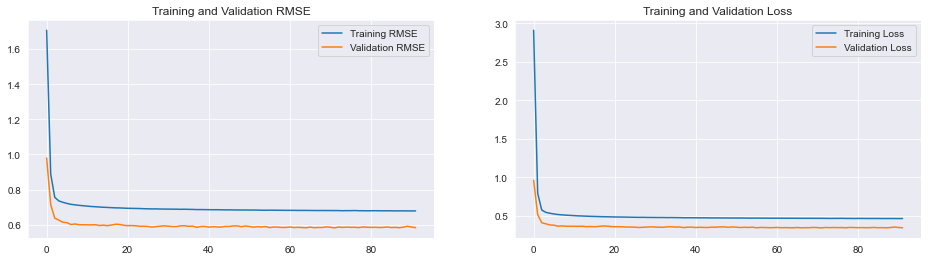

In [15]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(92)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training RMSE')
plt.plot(epochs_range, val_rmse, label='Validation RMSE')
plt.legend(loc='upper right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
model.save('dmsp.h5')